## Simple Linear Regression with Sythetic Data

### Learning Objectives:
1. Tune Hyperparameters -- learning rate, number of epochs, and batch size
2. Interperate different kinds of loss curves

In [2]:
# Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

### Define functions that build and train a model

* Write a function "build_model(my_learning_rate)" which will build an empty model
* Write a function "train_model(model, features, label, epochs)" which will train the model from the examples (features and labels)

In [17]:
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model"""
    # most simple tf.keras models are sequential and contain one or more layers
    model = tf.keras.models.Sequential()
    
    # Describe the topography of the model
    # For a simple linear Regression model its a single node in a single layer
    model.add(tf.keras.layers.Dense(units = 1, input_shape=(1,)))
    
    # Configure training to minimize the models mean squared error
    model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = my_learning_rate),
                 loss = "mean_squared_error",
                 metrics = [tf.keras.metrics.RootMeanSquaredError()])
    
    return model


def train_model(model, feature, label, epochs, batch_size):
    """Train the model by passing it labeled examples"""
    # Give the model features and labels
    # The model will train for the specified epochs, 
    # learning how features are related to labels
    history = model.fit(x= feature,
                        y= label,
                        batch_size= batch_size,
                        epochs= epochs)
    
    # Gather the trained model's weight and bias
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    # The list of epochs is stored seperately
    epochs = history.epoch
    
    # Gather the history of each epoch
    hist = pd.DataFrame(history.history)
    
    # Gather the rmse for at each epoch
    rmse = hist["root_mean_squared_error"]
    
    return trained_weight, trained_bias, epochs, rmse



### Define plotting functions using Matplotlib

* plot of the feature values vs the label values, and a line showing the output of the trained model
* plot a loss curve

In [23]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label"""
    
    # Label the axes
    plt.xlabel("feature")
    plt.ylabel("label")
    
    # Plot the feature vlaues vs the label values
    plt.scatter(feature, label)
    
    # Create a red line representing the model
    # Starts at (x0, y0) and ends at (x1, y1)
    x0 = 0
    y0 = trained_bias
    x1 = my_feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')
    
    # Render the scatter plot and model line
    plt.show()
    
    
def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve showing loss vs epoch"""
    
    # Define the figure and label axes
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    
    # Plot epochs vs rmse, legend, and set y axes 
    plt.plot(epochs, rmse, label="loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    
    # render plot
    plt.show()
    

### Define the Dataset

* create a small toy dataset of 12 examples, each example consists of one feature and one label

In [10]:
my_feature = ([float(i) for i in range(1, 13, 1)])
my_label = ([5.0, 8.8, 9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

### Specify the hyperparameters, Build and Train the model, then Plot the model and loss curve

* learning rate
* epochs
* batch_size

Epoch 1/10
1/1 [==============================] - 0s 997us/step - loss: 471.5901 - root_mean_squared_error: 21.7161
Epoch 2/10
1/1 [==============================] - 0s 998us/step - loss: 460.3298 - root_mean_squared_error: 21.4553
Epoch 3/10
1/1 [==============================] - 0s 996us/step - loss: 452.2922 - root_mean_squared_error: 21.2672
Epoch 4/10
1/1 [==============================] - 0s 998us/step - loss: 445.6400 - root_mean_squared_error: 21.1102
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 439.7915 - root_mean_squared_error: 20.9712
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 434.4774 - root_mean_squared_error: 20.8441
Epoch 7/10
1/1 [==============================] - 0s 994us/step - loss: 429.5479 - root_mean_squared_error: 20.7255
Epoch 8/10
1/1 [==============================] - 0s 996us/step - loss: 424.9097 - root_mean_squared_error: 20.6133
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 420.50

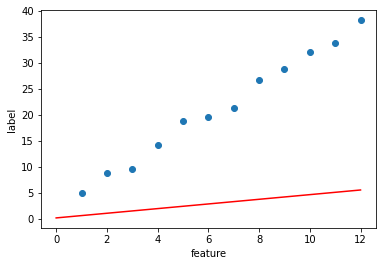

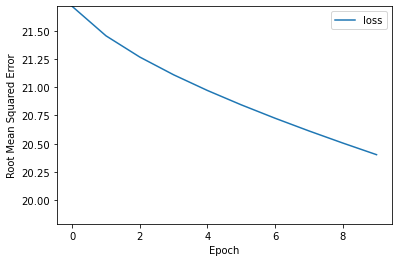

In [24]:
# Initialize hyperparametes
learning_rate = 0.01
epochs = 10
my_batch_size = 12

# Use learning rate to build the model
my_model = build_model(learning_rate)

# Train model with my_model, my_feature, my_label, and remaining hyperparameters
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)

# Plot the model and loss curve
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

### Examine the Graphs

Blue dots are the real data and the red line is the model predictions, the red line should align nicely to the blue dots but most likely it doesn't.

The loss curve is gradually decreassing but doesn't flatten out.

Maybe the learning rate is too small, maybe the epochs are to low, etc. -> we need to adjust hyperparameters

### Increase the number of epochs

* Try increasing the number of epochs to reach convergence, it's inefficient to train past convergence though so don't set it to an arbitrarily high value

Epoch 1/275
1/1 [==============================] - 0s 995us/step - loss: 278.5454 - root_mean_squared_error: 16.6897
Epoch 2/275
1/1 [==============================] - 0s 2ms/step - loss: 269.9125 - root_mean_squared_error: 16.4290
Epoch 3/275
1/1 [==============================] - 0s 2ms/step - loss: 263.7810 - root_mean_squared_error: 16.2413
Epoch 4/275
1/1 [==============================] - 0s 996us/step - loss: 258.7243 - root_mean_squared_error: 16.0849
Epoch 5/275
1/1 [==============================] - 0s 2ms/step - loss: 254.2919 - root_mean_squared_error: 15.9465
Epoch 6/275
1/1 [==============================] - 0s 2ms/step - loss: 250.2754 - root_mean_squared_error: 15.8201
Epoch 7/275
1/1 [==============================] - 0s 2ms/step - loss: 246.5585 - root_mean_squared_error: 15.7022
Epoch 8/275
1/1 [==============================] - 0s 2ms/step - loss: 243.0695 - root_mean_squared_error: 15.5907
Epoch 9/275
1/1 [==============================] - 0s 2ms/step - loss: 239.7

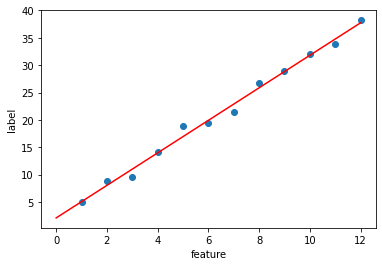

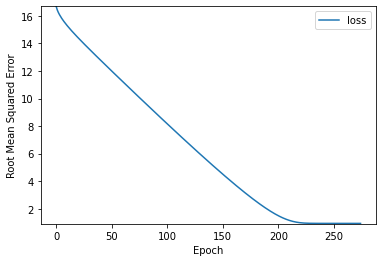

In [29]:
# Initialize hyperparametes
learning_rate = 0.01
epochs = 275
my_batch_size = 12

# Use learning rate to build the model
my_model = build_model(learning_rate)

# Train model with my_model, my_feature, my_label, and remaining hyperparameters
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)

# Plot the model and loss curve
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

### Try increasing the learning rate

* Sometimes we can get the model to converge more quickly with a higher learning rate, BUT if to high it will diverge

Epoch 1/275
1/1 [==============================] - 0s 2ms/step - loss: 507.3921 - root_mean_squared_error: 22.5254
Epoch 2/275
1/1 [==============================] - 0s 2ms/step - loss: 6699660.0000 - root_mean_squared_error: 2588.3701
Epoch 3/275
1/1 [==============================] - 0s 2ms/step - loss: 503.3988 - root_mean_squared_error: 22.4366
Epoch 4/275
1/1 [==============================] - 0s 2ms/step - loss: 2.9426 - root_mean_squared_error: 1.7154
Epoch 5/275
1/1 [==============================] - 0s 2ms/step - loss: 0.9627 - root_mean_squared_error: 0.9812
Epoch 6/275
1/1 [==============================] - 0s 2ms/step - loss: 0.9309 - root_mean_squared_error: 0.9648
Epoch 7/275
1/1 [==============================] - 0s 2ms/step - loss: 0.9265 - root_mean_squared_error: 0.9626
Epoch 8/275
1/1 [==============================] - 0s 2ms/step - loss: 0.9230 - root_mean_squared_error: 0.9607
Epoch 9/275
1/1 [==============================] - 0s 974us/step - loss: 0.9196 - root_me

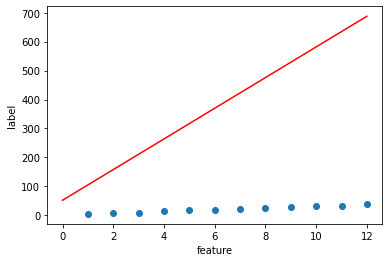

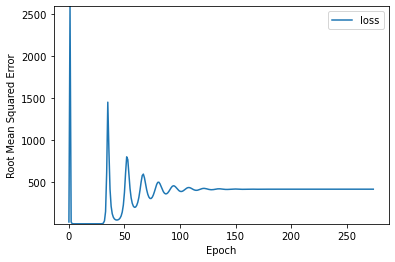

In [30]:
# Initialize hyperparametes
learning_rate = 100
epochs = 275
my_batch_size = 12

# Use learning rate to build the model
my_model = build_model(learning_rate)

# Train model with my_model, my_feature, my_label, and remaining hyperparameters
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)

# Plot the model and loss curve
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

### These Results are Terrible... Why?

The learning rate was set to high, this caused divergence. Look at the loss curve, when it oscillates so much that is a strong sign that the learning rate is to high.

### Experiment and try to find the ideal combination of epochs and learning rate

Epoch 1/40
1/1 [==============================] - 0s 998us/step - loss: 636.3358 - root_mean_squared_error: 25.2257
Epoch 2/40
1/1 [==============================] - 0s 998us/step - loss: 454.2518 - root_mean_squared_error: 21.3132
Epoch 3/40
1/1 [==============================] - 0s 2ms/step - loss: 350.1544 - root_mean_squared_error: 18.7124
Epoch 4/40
1/1 [==============================] - 0s 2ms/step - loss: 277.6825 - root_mean_squared_error: 16.6638
Epoch 5/40
1/1 [==============================] - 0s 1000us/step - loss: 223.1885 - root_mean_squared_error: 14.9395
Epoch 6/40
1/1 [==============================] - 0s 2ms/step - loss: 180.5486 - root_mean_squared_error: 13.4368
Epoch 7/40
1/1 [==============================] - 0s 990us/step - loss: 146.4081 - root_mean_squared_error: 12.0999
Epoch 8/40
1/1 [==============================] - 0s 2ms/step - loss: 118.6947 - root_mean_squared_error: 10.8947
Epoch 9/40
1/1 [==============================] - 0s 2ms/step - loss: 96.0191 -

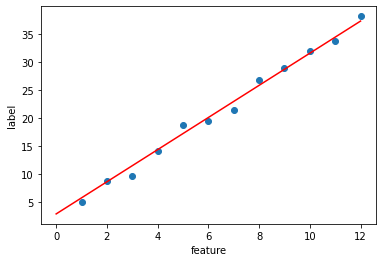

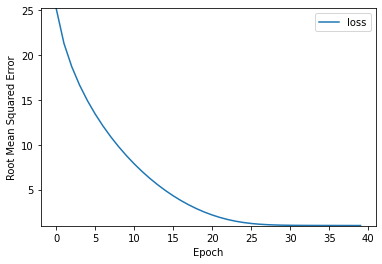

In [31]:
# Initialize hyperparametes
learning_rate = 0.15
epochs = 40
my_batch_size = 12

# Use learning rate to build the model
my_model = build_model(learning_rate)

# Train model with my_model, my_feature, my_label, and remaining hyperparameters
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)

# Plot the model and loss curve
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

### What happens when we adjust the batch size

The model recalculates the loss and adjusts the wieghts and bias after each iteration.

Each iteration is the batch size, for example if the batch is 6 each iteration is 6 examples.

An epoch spans enough iterations to process every example in the dataset. For example if the batch size is 12 then an epoch is 1 iteration BUT if the batch size is 6 then an epoch is 2 iterations.

***Its tempting to set the batch size to the number of examples in the dataset (12 in this case) but the model might actually train faster on smaller batches, however very small batchs might not contain enough information to help the model converge.***

So experiment with batch size and see what happens.

Epoch 1/50
3/3 [==============================] - 0s 998us/step - loss: 643.8219 - root_mean_squared_error: 25.3736
Epoch 2/50
3/3 [==============================] - 0s 665us/step - loss: 533.9342 - root_mean_squared_error: 23.1070
Epoch 3/50
3/3 [==============================] - 0s 665us/step - loss: 461.7852 - root_mean_squared_error: 21.4892
Epoch 4/50
3/3 [==============================] - 0s 996us/step - loss: 403.3216 - root_mean_squared_error: 20.0829
Epoch 5/50
3/3 [==============================] - 0s 991us/step - loss: 354.2549 - root_mean_squared_error: 18.8217
Epoch 6/50
3/3 [==============================] - 0s 1ms/step - loss: 311.3611 - root_mean_squared_error: 17.6454
Epoch 7/50
3/3 [==============================] - 0s 998us/step - loss: 273.2401 - root_mean_squared_error: 16.5300
Epoch 8/50
3/3 [==============================] - 0s 665us/step - loss: 239.0743 - root_mean_squared_error: 15.4620
Epoch 9/50
3/3 [==============================] - 0s 1ms/step - loss: 207.

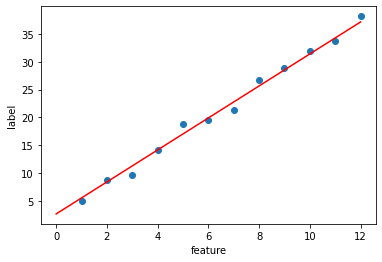

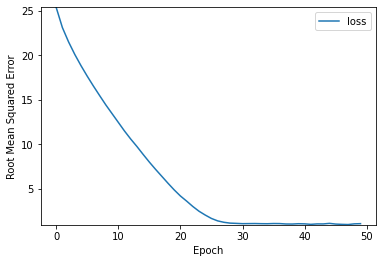

In [36]:
# Initialize hyperparametes
learning_rate = 0.05
epochs = 50
my_batch_size = 4

# Use learning rate to build the model
my_model = build_model(learning_rate)

# Train model with my_model, my_feature, my_label, and remaining hyperparameters
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)

# Plot the model and loss curve
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Summary on hyperparameter tuning

Most ML problems require lots of hyperparameter tuning and there is no concrete rule for every model.

***You must experiment to find the best set of hyperparameters for your dataset***

Here are a few rules of thumb:
* Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve approaches 0
* If the training loss doesn't converge train for more epochs
* If the training loss decreases too slowly, increase your learning rate, but make sure it is not too high
* If training loss vaires wildly (that is, the loss jumps around alot), decrease the learning rate
* Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination
* Setting the batch size to a very small batch number can also cause instability. First, try larger batch sizes, then, decrease the size until you see degradation
* For real-world datasets consisting of a very large number of examples, the entire sataset might not fit into memory. In such cases, you will have to reduce the batch size to enable a batch to fit into memory.

***Remember the ideal combination of hyperparameters is data dependent, always experiment and verify***